# Introduction to nonequilibrium molecular dynamics
This is an introduction to NEMD using codes developed by the Bernhardt group and collaborators over the years. There will be more tutorial text here eventually, but this notebook is just a barebones proof-of-concept. For now, here are the equations for Verlet integration:

\begin{equation}
\vec{v}(t + \frac{1}{2}\delta t) = \vec{v}(t) + \frac{1}{2}\delta t \vec{a}(t)\\
\vec{r}(t + \delta t) = \vec{r}(t) + \delta t \vec{v}(t + \frac{1}{2}\delta t)\\
\vec{v}(t + \delta t) = \vec{v}(t + \frac{1}{2}\delta t) + \frac{1}{2}\delta t \vec{a}(t + \delta t)
\end{equation}

First, we need to `import` the compatibility module which allows python (and jupyter) to access our NEMD codes, which are written in Fortran. First, we need to ensure that the notebook kernel can find our custom modules...

In [37]:
import sys
#sys.path.append("../") # Change this to the location of the QtNEMD repository
import numpy as np

## Setting up the Fortran Backend
The backends for QtNEMD have an abstract interface, so we don't need to worry too much about the implementation details of the underlying MD code. The first thing we need to do is create an instance of our MD driver. No need for a specific initialisation routine, as this is handled in the constructor.

In [90]:
import FortranDriver
md = FortranDriver.MDInterface()

We can verify that everything was set up correctly by printing some subset of the particle positions...

In [67]:
print(f"Num. particles = {md.npart}")
print("Particle (x,y,z) positions:")
for tup in zip(md.x[0:10], md.y[0:10], md.z[0:10]):
    print(tup)
print("...")

Num. particles = 500
Particle (x,y,z) positions:
(0.38796496, 0.40284157, 0.39267302)
(1.1952934, 1.1891637, 0.39983797)
(0.39762783, 1.1920681, 1.194201)
(1.1882529, 0.3990147, 1.1903024)
(0.40205336, 0.39170194, 1.9736062)
(1.1967843, 1.1854362, 1.9891634)
(0.40277863, 1.1828065, 2.7714372)
(1.1961408, 0.39606237, 2.7805176)
(0.39024496, 0.40240788, 3.5771115)
(1.1838131, 1.1797209, 3.5776231)
...


While the raw positions are not super easy to read, we can see that there's some kind of periodic structure to the particle positions. Let's plot the `(x, y,z)` coordinates to get a better picture:

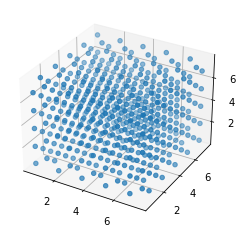

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(md.x, md.y, md.z, 'o')

We can clearly see that they are located on a periodic lattice of some kind. It's a bit difficult to see in 3D (the plot is a little busy), but the particle positions are initialised to sit on the sites of a [face-centred cubic (FCC) lattice](https://en.wikipedia.org/wiki/Cubic_crystal_system#Bravais_lattices).

3D plots are nice when we want a big-picture view of the structure of our system, but they can get very busy when we have a lot of particles moving around. From this point on, we're only going to plot the `x` and `y` coordinates of the particles to give a 2D view of our 3D system. Here's what the initial configuration looks in this view:

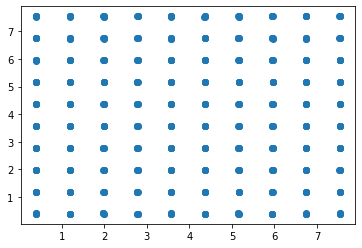

In [41]:
plt.plot(md.x, md.y, 'o')

## Do some MD
We're all set up, so let's use our code to actually do some molecular dynamics. The MD wrapper lets us do this by calling the `run()` method with the number of time-steps we want to run for. Let's start by running for 100 steps, and then plot the particle positions again (this next cell may take a while to execute):

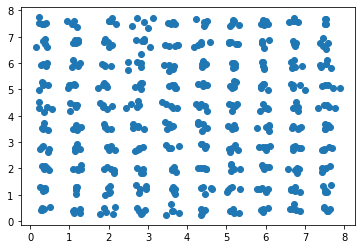

In [42]:
md.run(500)
plt.plot(md.x, md.y, 'o')

Cool! The particles have moved from their initial positions on the lattice sites. Clearly our code has done something, but there's more to MD simulations than just drawing pretty pictures.